#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
選用 "MSE"
查看Train/test accurancy and loss rate
'''

'\n作業:\n選用 "MSE"\n查看Train/test accurancy and loss rate\n'

In [23]:
#模型編譯
model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

In [24]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
      
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
 - 15s - loss: 0.0699 - acc: 0.4355 - val_loss: 0.0615 - val_acc: 0.5546
Epoch 2/12
 - 12s - loss: 0.0558 - acc: 0.5734 - val_loss: 0.0532 - val_acc: 0.6282
Epoch 3/12
 - 12s - loss: 0.0499 - acc: 0.6272 - val_loss: 0.0527 - val_acc: 0.6449
Epoch 4/12
 - 12s - loss: 0.0456 - acc: 0.6629 - val_loss: 0.0461 - val_acc: 0.6694
Epoch 5/12
 - 12s - loss: 0.0422 - acc: 0.6932 - val_loss: 0.0450 - val_acc: 0.6778
Epoch 6/12
 - 13s - loss: 0.0387 - acc: 0.7239 - val_loss: 0.0429 - val_acc: 0.6934
Epoch 7/12
 - 13s - loss: 0.0354 - acc: 0.7491 - val_loss: 0.0408 - val_acc: 0.7097
Epoch 8/12
 - 13s - loss: 0.0328 - acc: 0.7687 - val_loss: 0.0400 - val_acc: 0.7206
Epoch 9/12
 - 13s - loss: 0.0296 - acc: 0.7922 - val_loss: 0.0388 - val_acc: 0.7205
Epoch 10/12
 - 12s - loss: 0.0273 - acc: 0.8111 - val_loss: 0.0377 - val_acc: 0.7310
Epoch 11/12
 - 12s - loss: 0.0247 - acc: 0.8322 - val_loss: 0

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

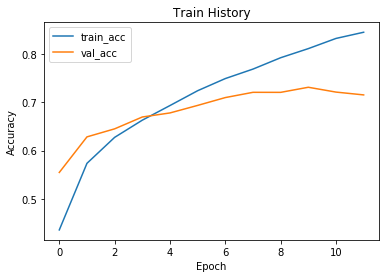

In [26]:
show_train_history('acc','val_acc')

In [27]:
'''
作業:
選用"binary_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n選用"binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
      
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
 - 15s - loss: 0.2380 - acc: 0.9108 - val_loss: 0.2084 - val_acc: 0.9164
Epoch 2/12
 - 12s - loss: 0.1875 - acc: 0.9264 - val_loss: 0.1832 - val_acc: 0.9276
Epoch 3/12
 - 12s - loss: 0.1657 - acc: 0.9347 - val_loss: 0.1749 - val_acc: 0.9305
Epoch 4/12
 - 12s - loss: 0.1495 - acc: 0.9412 - val_loss: 0.1638 - val_acc: 0.9366
Epoch 5/12
 - 12s - loss: 0.1352 - acc: 0.9473 - val_loss: 0.1507 - val_acc: 0.9416
Epoch 6/12
 - 13s - loss: 0.1218 - acc: 0.9525 - val_loss: 0.1397 - val_acc: 0.9464
Epoch 7/12
 - 13s - loss: 0.1099 - acc: 0.9571 - val_loss: 0.1350 - val_acc: 0.9474
Epoch 8/12
 - 13s - loss: 0.0991 - acc: 0.9615 - val_loss: 0.1369 - val_acc: 0.9475
Epoch 9/12
 - 13s - loss: 0.0866 - acc: 0.9670 - val_loss: 0.1269 - val_acc: 0.9515
Epoch 10/12
 - 12s - loss: 0.0781 - acc: 0.9700 - val_loss: 0.1256 - val_acc: 0.9514
Epoch 11/12
 - 13s - loss: 0.0689 - acc: 0.9739 - val_loss: 0

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

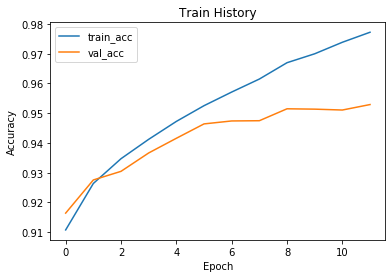

In [24]:
show_train_history('acc','val_acc')

In [25]:
'''
作業:
比較"categorical_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n比較"categorical_crossentropy"\n查看Train/test accurancy and loss rate\n'

In [26]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [27]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
      
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=2)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
 - 13s - loss: 0.3075 - acc: 0.8954 - val_loss: 0.7652 - val_acc: 0.7445
Epoch 2/12
 - 13s - loss: 0.2643 - acc: 0.9101 - val_loss: 0.8190 - val_acc: 0.7301
Epoch 3/12
 - 12s - loss: 0.2371 - acc: 0.9194 - val_loss: 0.7819 - val_acc: 0.7379
Epoch 4/12
 - 12s - loss: 0.2206 - acc: 0.9240 - val_loss: 0.8002 - val_acc: 0.7381
Epoch 5/12
 - 12s - loss: 0.1934 - acc: 0.9336 - val_loss: 0.7887 - val_acc: 0.7474
Epoch 6/12
 - 13s - loss: 0.1773 - acc: 0.9403 - val_loss: 0.7861 - val_acc: 0.7431
Epoch 7/12
 - 13s - loss: 0.1653 - acc: 0.9430 - val_loss: 0.8006 - val_acc: 0.7440
Epoch 8/12
 - 13s - loss: 0.1617 - acc: 0.9457 - val_loss: 0.8164 - val_acc: 0.7423
Epoch 9/12
 - 12s - loss: 0.1426 - acc: 0.9508 - val_loss: 0.8358 - val_acc: 0.7419
Epoch 10/12
 - 12s - loss: 0.1341 - acc: 0.9561 - val_loss: 0.8261 - val_acc: 0.7418
Epoch 11/12
 - 12s - loss: 0.1309 - acc: 0.9560 - val_loss: 0.8561 - val_acc: 0.7387
Epoch 12/12
 - 12s - los

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

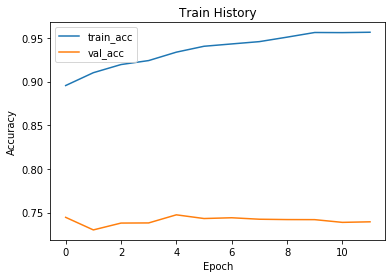

In [29]:
show_train_history('acc','val_acc')